In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
df = pd.read_csv("C:/Users/abhin/Downloads/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.info()
#Age, Cabin and Embarked have missing values we will have to handle them 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df['Ticket'].value_counts
unique_ticket_count = df['Ticket'].nunique()
print(f"Number of unique values in Ticket column: {unique_ticket_count}")

Number of unique values in Ticket column: 681


In [22]:
# cabin has a lot of null vlaues so it's better to drop it also name will not be useful for our analysis 
# passenger id is also not useful so we will drop it
# Ticket has high cardinality. This can lead to overfitting. So we will drop it as well
df.drop(['Cabin','Name','Ticket','PassengerId','Fare'],axis=1,inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_18892\2607861321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


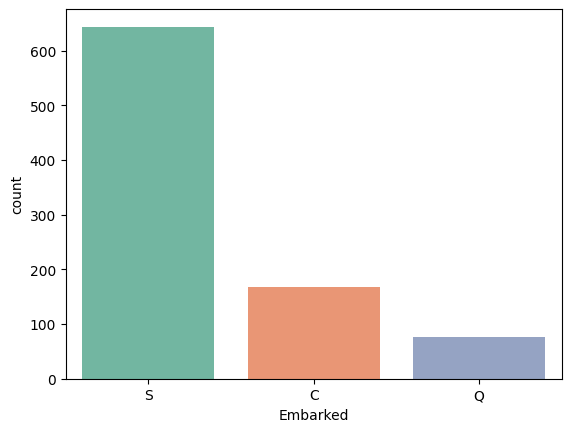

In [23]:
df['Embarked'].value_counts()
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

In [24]:
#as most of the people embarked from S we will fill the missing values with S
df['Embarked'].fillna('S',inplace=True)
print(df['Embarked'].isnull().sum())   

0


C:\Users\abhin\AppData\Local\Temp\ipykernel_18892\1222758662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


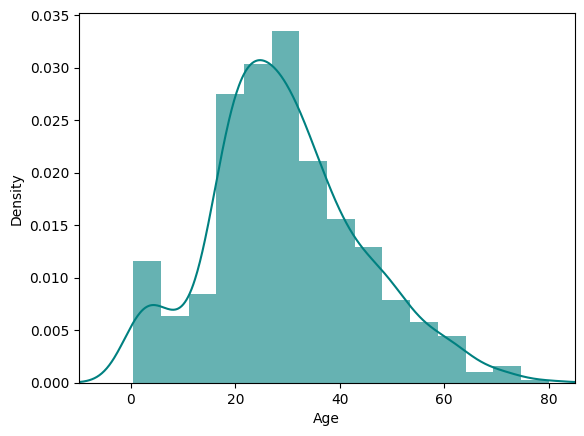

In [25]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [26]:
# Fill the null values in the 'Age' column with the median age as age is right skewed so median is a better choice
df['Age'].fillna(df['Age'].median(), inplace=True)

In [27]:
df.info()
#no null vlaues now 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [28]:
#X contains every column except the target variable
X = df.drop('Survived',axis=1)
#target variable
Y = df['Survived']

In [29]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
shuffled_indices = np.random.permutation(len(X))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the indices into training and testing sets
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

# Split the data into training and testing sets
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
Y_train = Y.iloc[train_indices]
Y_test = Y.iloc[test_indices]

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (712, 6)
X_test shape: (179, 6)
Y_train shape: (712,)
Y_test shape: (179,)


In [30]:
object_columns_X_train = X_train.select_dtypes(include=['object']).columns
print(object_columns_X_train)

Index(['Sex', 'Embarked'], dtype='object')


In [31]:
#convert the categorical columns to numerical columns
X_train = pd.get_dummies(X_train, columns=object_columns_X_train, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_columns_X_train, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
709,3,28.00,1,1,True,False,False
439,2,31.00,0,0,True,False,True
840,3,20.00,0,0,True,False,True
720,2,6.00,0,1,False,False,True
39,3,14.00,1,0,False,False,False
...,...,...,...,...,...,...,...
505,1,18.00,1,0,True,False,False
639,3,28.00,1,0,True,False,True
878,3,28.00,0,0,True,False,True
824,3,2.00,4,1,True,False,True


In [32]:
# Replace True with 1 and False with 0 in all encoded columns
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Display the updated X_train and X_test
print(X_train.head())
print(X_test.head())

     Pclass  Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S
709       3   28      1      1         1           0           0
439       2   31      0      0         1           0           1
840       3   20      0      0         1           0           1
720       2    6      0      1         0           0           1
39        3   14      1      0         0           0           0
     Pclass  Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S
619       2   26      0      0         1           0           1
761       3   41      0      0         1           0           1
645       1   48      1      0         1           0           0
754       2   48      1      2         0           0           1
556       1   48      1      0         0           0           0


In [33]:
# # Select only the numerical columns from X_train
# X_train_num = X_train.select_dtypes(include=[np.number])

# # Compute the correlation matrix
# correlation_matrix = X_train_num.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .9})
# plt.title('Correlation Matrix')
# plt.show()

In [34]:
# def get_highly_correlated_columns(correlation_matrix, threshold=0.8):
#     """
#     This function returns a list of tuples containing pairs of columns that are highly correlated.
    
#     Parameters:
#     correlation_matrix (pd.DataFrame): The correlation matrix of the dataframe.
#     threshold (float): The threshold value above which columns are considered highly correlated.
    
#     Returns:
#     list: A list of tuples containing pairs of highly correlated columns.
#     """
#     correlated_columns = []
#     for col in correlation_matrix.columns:
#         for row in correlation_matrix.index:
#             if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
#                 correlated_columns.append((row, col))
#     return correlated_columns

# # Example usage
# highly_correlated_columns = get_highly_correlated_columns(correlation_matrix, threshold=0.8)
# print(highly_correlated_columns)
# #no columns are highly correlated

In [35]:
# Normalize the training and testing data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [36]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


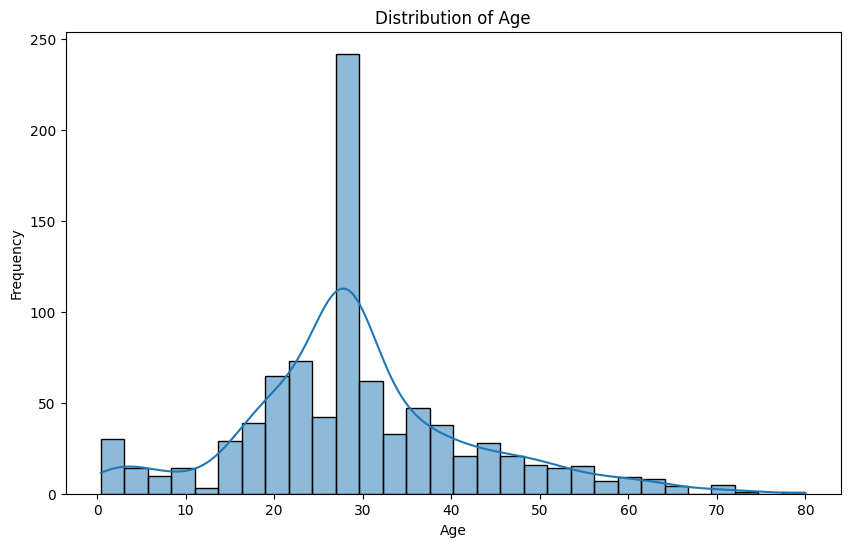

C:\Users\abhin\AppData\Local\Temp\ipykernel_18892\2777611696.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


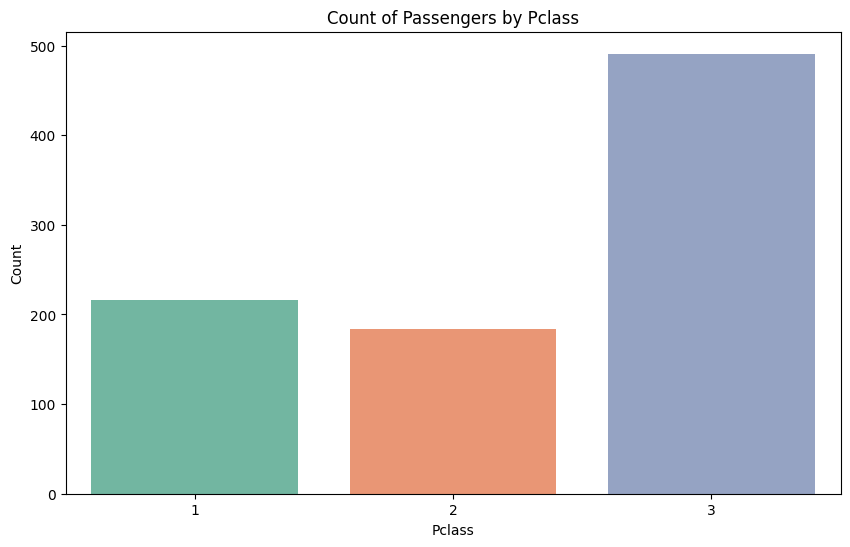

C:\Users\abhin\AppData\Local\Temp\ipykernel_18892\2777611696.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


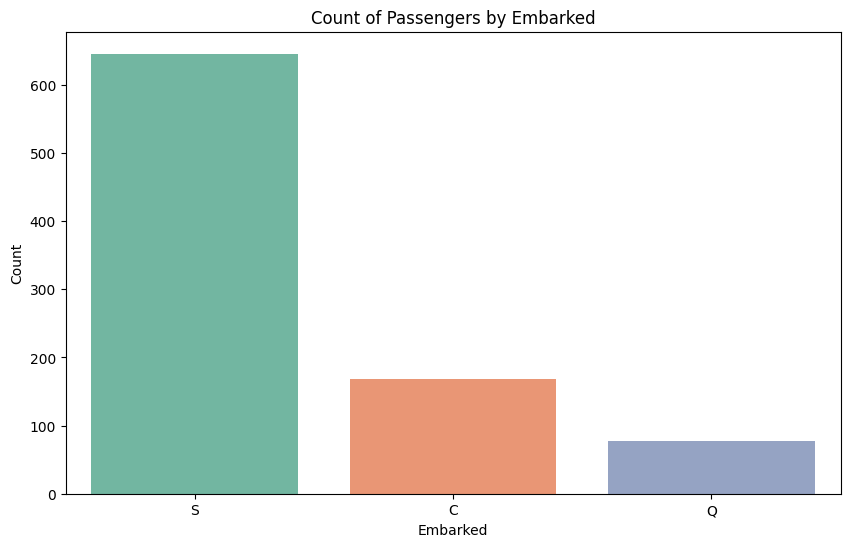

C:\Users\abhin\AppData\Local\Temp\ipykernel_18892\2777611696.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')


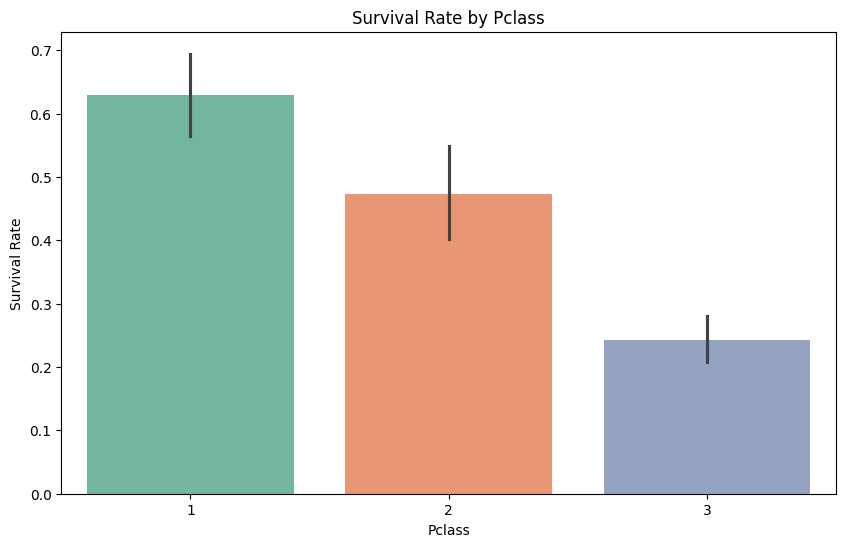

C:\Users\abhin\AppData\Local\Temp\ipykernel_18892\2777611696.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='Set2')


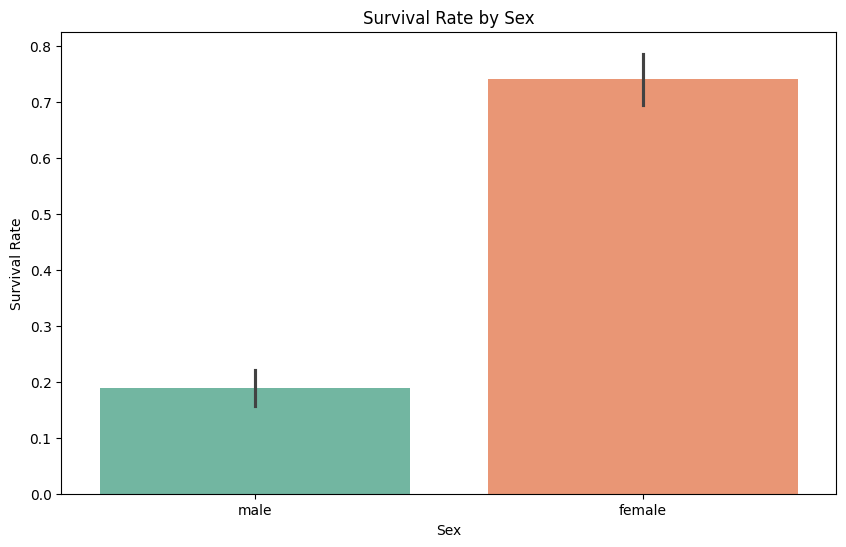

In [37]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# # Distribution of Fare
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Fare'], bins=30, kde=True)
# plt.title('Distribution of Fare')
# plt.xlabel('Fare')
# plt.ylabel('Frequency')
# plt.show()

# Count of passengers by Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Count of passengers by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [38]:
# Example usage:
# Initialize the model
log_reg = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Fit the model
log_reg.fit(X_train, Y_train)

In [39]:
# Predict on the test set
print(Y_test.values)
predictions = log_reg.predict(X_test)
print(predictions)

[0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1]


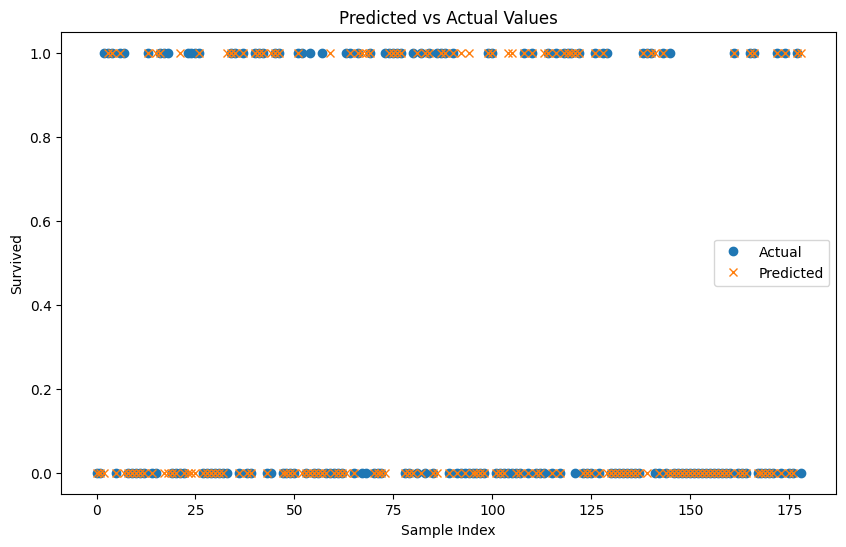

In [40]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual', linestyle='None', marker='o')
plt.plot(predictions, label='Predicted', linestyle='None', marker='x')
plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Survived')
plt.legend()
plt.show()

In [41]:
# Calculate the accuracy
accuracy = np.mean(predictions == Y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.45%
